Dynamic power flow examples

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from dem import *

matplotlib.rc("figure", figsize=(16,6))
matplotlib.rc("lines", linewidth=2)

N = 100
p_load = np.sin(np.pi*np.arange(N)/N)

# Basic examples

## Time-varying load

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10c593410>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10c687090>], dtype=object)

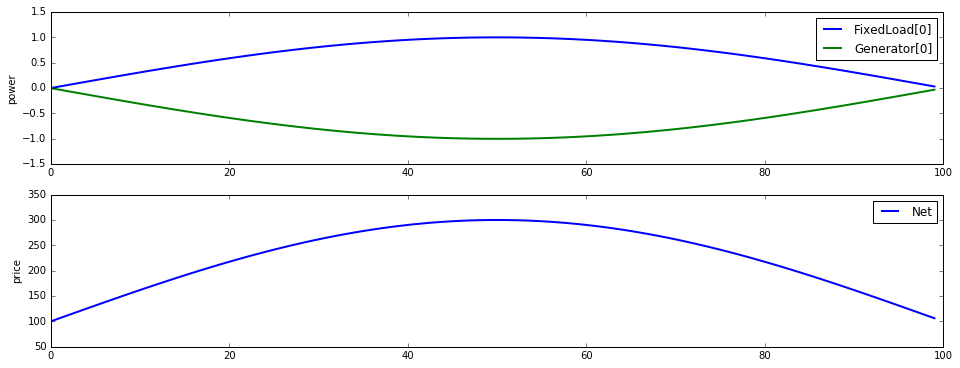

In [3]:
load = FixedLoad(p=p_load)
gen = Generator(p_max=2, p_min=-0.1, alpha=100, beta=100)

net = Net([load.terminals[0], gen.terminals[0]])
network = Group([load, gen], [net])
network.optimize(time_horizon=N)
network.plot_results()

## Storage

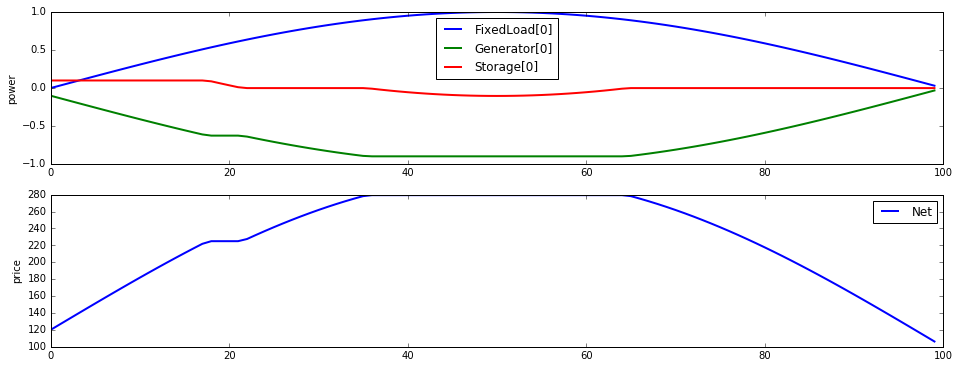

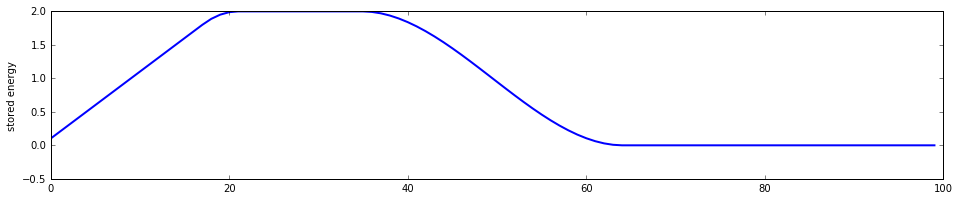

In [13]:
load = FixedLoad(p=p_load)
gen = Generator(p_max=2, alpha=100, beta=100)
storage = Storage(p_min=-0.4, p_max=0.1, E_max=2)

net = Net([load.terminals[0], gen.terminals[0], storage.terminals[0]])
network = Group([load, gen, storage], [net])
network.optimize(time_horizon=N)
network.plot_results()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,3))
ax.plot(storage.energy.value)
ax.set_ylabel("stored energy")


## Deferrable load

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10d42f810>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10d488850>], dtype=object)

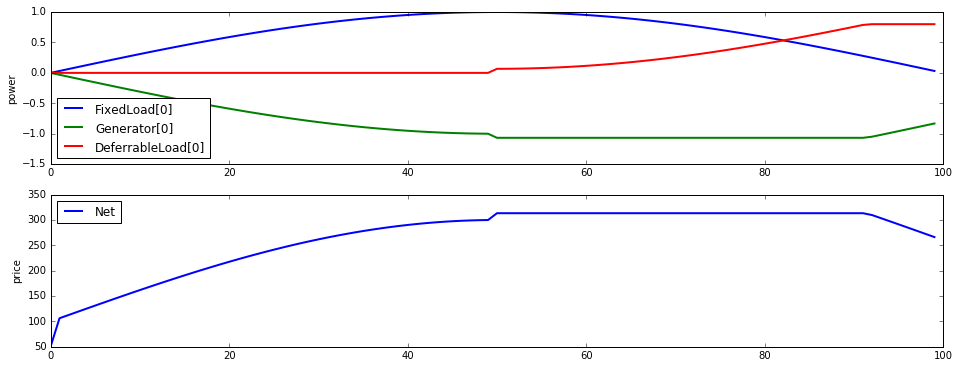

In [6]:
load = FixedLoad(p=p_load)
gen = Generator(p_max=2, alpha=100, beta=100)
deferrable = DeferrableLoad(t_start=50, E=20, p_max=0.8)

net = Net([load.terminals[0], gen.terminals[0], deferrable.terminals[0]])
network = Group([load, gen, deferrable], [net])
network.optimize(time_horizon=N)
network.plot_results()

## Thermal load

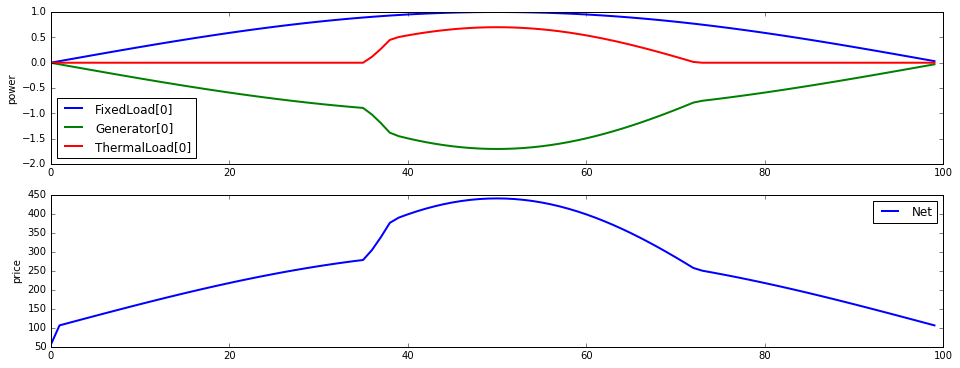

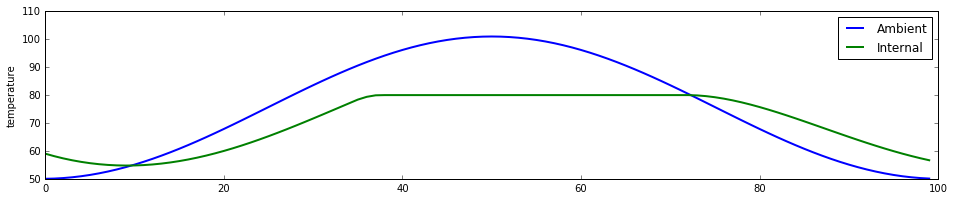

In [47]:
T_ambient = (np.sin(np.pi*np.arange(N)/N) + 1e-2).reshape(-1,1)**2*50+50

load = FixedLoad(p=p_load)
gen = Generator(p_max=2, alpha=100, beta=100)
thermal = ThermalLoad(
    T_init=60, T_ambient=T_ambient, T_min=None, T_max=80,
    p_max=2, conduct_coeff=0.1, efficiency=3., capacity=1.)

net = Net([load.terminals[0], gen.terminals[0], thermal.terminals[0]])
network = Group([load, gen, thermal], [net])
network.optimize(time_horizon=N)
network.plot_results()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,3))
ax.plot(T_ambient, label="Ambient")
ax.plot(thermal.T.value, label="Internal")
ax.set_ylabel("temperature")
ax.legend()